# Mobile App for Lottery Addiction


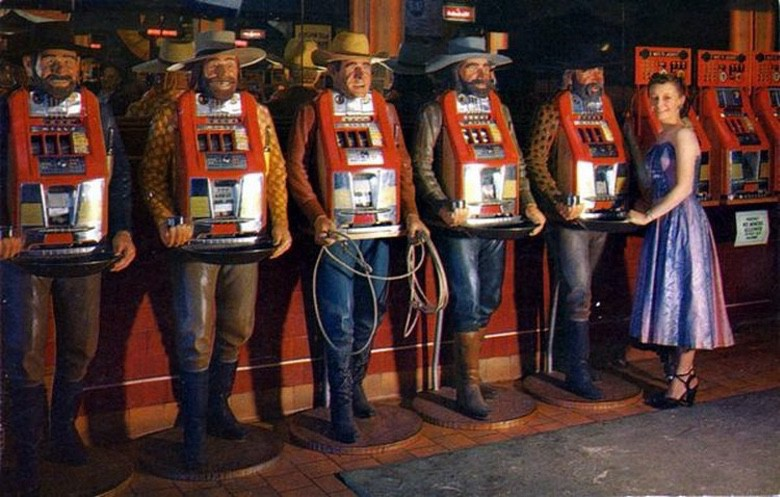

Many people start playing the lottery for fun, but for some this activity turns into a habit which eventually escalates into addiction. Like other compulsive gamblers, lottery addicts soon begin spending from their savings and loans, they start to accumulate debts, and eventually engage in desperate behaviors like theft.

A medical institute that aims to prevent and treat gambling addictions wants to build a dedicated mobile app to help lottery addicts better estimate their chances of winning. The institute has a team of engineers that will build the app, but they need us to create the logical core of the app and calculate probabilities.

For the first version of the app, they want us to focus on the <a href="https://en.wikipedia.org/wiki/Lotto_6/49" target="_blank">6/49 lottery</a>  and build functions that enable users to answer questions like:

* What is the probability of winning the big prize with a single ticket?

* What is the probability of having at least five (or four, or three, or two) winning numbers on a single ticket?

* What is the probability of winning the big prize if we play 40 different tickets (or any other number)?

The institute also wants us to consider historical data coming from the national 6/49 lottery game in Canada. The <a href="https://www.kaggle.com/datascienceai/lottery-dataset" target="_blank">data set</a> has data for 3,665 drawings, dating from 1982 to 2018.

Import required modules:

In [1]:
import math
import numpy as np
import pandas as pd
from IPython.display import display

### Define probability of various combination - from 2 numbers to 6 -  for single ticket 

Because recursion is a power tool for experienced programmer and in inept hands can lead to stack overflow I will use standard function comb(n, k) from Python <a href="https://docs.python.org/3/library/math.html#module-math" target="_blank"> math </a>  library.
Calculate probability  for single ticket with `one_ticket_probability` function:

In [2]:
def one_ticket_probability():
    """
    Calculate probability for combination 2 - 6 numbers from 49 and display dataframe like Excel table.
    """
    combinations_txt = []
    combinations = []
    probability_percent = []
    for i in range(2, 7):
        combinations_txt.append(f"{i}/49")
        if i <= 5:
            """
            math.comb(49,6) - total combinations for 7 numbers from 49,
            math.comb(6, i) - total combinations for positive outcomes for i number from 6,
            for example 5 from 6
            math.comb(43, 6-i) - total combinations for negative  outcomes for (6-i) number from 43,
            for example 1 from 43
            """
            combination_number = math.comb(49,6)/(math.comb(6, i) * math.comb( 43, 6-i))
            combinations.append(combination_number)
            probability_percent.append(100.0/combination_number)
        else:
            combination_number = math.comb(49,6)
            combinations.append(combination_number)
            probability_percent.append(100.0/combination_number)
    single_ticket = pd.DataFrame({"matches": combinations_txt,
                                  "combinations": combinations,
                                  "chance_win_%": probability_percent})
    return single_ticket

st_df = one_ticket_probability()
display(st_df.style.format({"combinations":"{:,.2f}", "chance_win_%": "{:.4g}"}))

,matches,combinations,chance_win_%
0,2/49,7.55,13.24
1,3/49,56.66,1.765
2,4/49,"1,032.40",0.09686
3,5/49,"54,200.84",0.001845
4,6/49,"13,983,816.00",7.151e-06


## Define quantity of tickets for required probability
Calculate probability for multi ticket probability and possible spent money  with `multi_ticket_probability` function:

In [3]:
def multi_ticket_probability(value):
    """
    multi_ticket_probability(probaility)  - calculator lticket nimber for
    desured probability. 
    Enter a positive integer or float number more 0 and less equal 100
    return dataframe.
    Price of each ticket is 3 CAD.
    """
    combinations_txt = []
    combinations = []
    probability_perc = []
    # Price each ticket is 3 CAD
    tickets = []
    spent = []
    for i in range(2, 7):
        combinations_txt.append(f"{i}/49")
        if i <= 5:
            combination_number = math.comb(49,6)/(math.comb(6, i) * math.comb( 43, 6-i))
            combinations.append(combination_number)
            probability_perc.append(value)
            ticket_number = int(math.ceil(value*combination_number/100.0))
            tickets.append(ticket_number)
            spent.append(ticket_number * 3)
        else:
            combination_number = math.comb(49,6)
            combinations.append(combination_number)
            probability_perc.append(value)
            ticket_number = int(math.ceil(value*combination_number/100.0))
            tickets.append(ticket_number)
            spent.append(ticket_number * 3)        
    multi_ticket = pd.DataFrame({"matches": combinations_txt,
                                  "desired_probability_%": probability_perc,
                                  "tickets": tickets,
                                  "spent_total_cad": spent})
    return multi_ticket

mt_df = multi_ticket_probability(100)
mt_df.style.format({"tickets":"{:,}", "spent_total_cad": "${:,.2f}"})

,matches,desired_probability_%,tickets,spent_total_cad
0,2/49,100,8,$24.00
1,3/49,100,57,$171.00
2,4/49,100,"1,033","$3,099.00"
3,5/49,100,"54,201","$162,603.00"
4,6/49,100,"13,983,816","$41,951,448.00"


Compare required spent money for 100% probability win  and possible win money amount using official data for drawing 
of 1 May 2021 year, then won CASH WINNERS : 160,991  - you can see these results <a href="https://www.olg.ca/en/lottery/play-lotto-649-encore/past-results.html" target="_blank">here</a>. I copy this table from Internet to excel and import excel file to dataframe.

In [4]:
draw_2021_05_01 = pd.read_excel("data/2021_05_01.xlsx")
display(draw_2021_05_01)

,Matches,Tickets Won,Prize
0,2/6,627614,FREE PLAY
1,2/6 + Bonus,66053,$5.00
2,3/6,90254,$10.00
3,4/6,4600,$90.20
4,5/6,81,"$2,696.90"
5,5/6 + Bonus,3,"$87,379.10"
6,6/6,0,"$15,661,218.20"


It seen that amount of prize less in the 2.68 - 17.0 times that required spent money amount for procuring 100% probability. 

##  Checks  when whether a certain combination has occurred in the Canada lottery data set

Import data set and collect general information about it:

In [5]:
# Open dataset
l_649 = pd.read_csv("data/649.csv", parse_dates=[3])

# Display first five rows
display(l_649.head(5))

# Display info about dataset
l_649.info()

# Display least five rows
display(l_649.tail(5))

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,1982-06-12,3,11,12,14,41,43,13
1,649,2,0,1982-06-19,8,33,36,37,39,41,9
2,649,3,0,1982-06-26,1,6,23,24,27,39,34
3,649,4,0,1982-07-03,3,9,10,13,20,43,34
4,649,5,0,1982-07-10,5,14,21,31,34,47,45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PRODUCT          3665 non-null   int64         
 1   DRAW NUMBER      3665 non-null   int64         
 2   SEQUENCE NUMBER  3665 non-null   int64         
 3   DRAW DATE        3665 non-null   datetime64[ns]
 4   NUMBER DRAWN 1   3665 non-null   int64         
 5   NUMBER DRAWN 2   3665 non-null   int64         
 6   NUMBER DRAWN 3   3665 non-null   int64         
 7   NUMBER DRAWN 4   3665 non-null   int64         
 8   NUMBER DRAWN 5   3665 non-null   int64         
 9   NUMBER DRAWN 6   3665 non-null   int64         
 10  BONUS NUMBER     3665 non-null   int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 315.1 KB


,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
3660,649,3587,0,2018-06-06,10,15,23,38,40,41,35
3661,649,3588,0,2018-06-09,19,25,31,36,46,47,26
3662,649,3589,0,2018-06-13,6,22,24,31,32,34,16
3663,649,3590,0,2018-06-16,2,15,21,31,38,49,8
3664,649,3591,0,2018-06-20,14,24,31,35,37,48,17


It seen that dataset doesn't contain NaN values, 
Write function that check containing list of numbers in the dataset  and if list of number exists in the dataset then returns date of  occurence or warning message if list of numbers doesn't exist in the dataset. 
and check it.

In [6]:
def check_historical_occurrence(df, numbers):
    """
    Return dataframe contains outcome numbers or warning text if numbers 
    doesn't exist in dataframe
    Input agruments: df - dataframe, numbers - list of numbers
    """
    # Checks len of list
    if len(numbers) < 2 or len(numbers) > 6:
        return "Error value, enter from two to six digits in range 1 - 49!"
    # Copy list
    numbers = numbers[:]
    # Convert list to set
    test_set = set(numbers[:])
    # Create empty lists for creating further dataframe 
    numbers_list = []
    date_list = []
    count_list = []
    i = 0
    # Checking numbers in rows of dataframe
    for index, row in df.copy().iterrows():
        if test_set.issubset(set(row[4:10])):
            numbers_list.append(numbers)
            date_list.append(row[3].strftime("%d %B %Y"))
            i += 1
            count_list.append(i)
    # If list of numbers of exits - return warning
    if len(count_list) == 0:
        return f"The  combination of yours numbers: {numbers} doesn't \
exist in the current dataset!"
    # If list of numbers contains in dataset - creting and return dataframe
    # Creating first two coumns
    occurence_df = pd.DataFrame({"occurence_no": count_list,
                                 "date_occurence":date_list})
    # Add columns for existing numbers of data set
    for i, column in enumerate(numbers_list[0]):
        occurence_df.insert(i+2, column = f"Number {i+1}", value = 0)
    occurence_df.iloc[:,2:] = np.array(numbers_list)
    return occurence_df

# Check existing lists from [1,2] to [1, 2, 3, 4, 5, 6] in the l_649 dataset
display(check_historical_occurrence(l_649, [1,2]).head(3))
display(check_historical_occurrence(l_649, [1,2]).tail(3))
display(check_historical_occurrence(l_649, [1,2,3]))
display(check_historical_occurrence(l_649, [1,2,3,4]))
display(check_historical_occurrence(l_649, [1,2,3,4, 5]))
display(check_historical_occurrence(l_649, [1,2,3,4, 5, 6]))

,occurence_no,date_occurence,Number 1,Number 2
0,1,13 August 1983,1,2
1,2,12 November 1983,1,2
2,3,24 December 1983,1,2


,occurence_no,date_occurence,Number 1,Number 2
44,45,25 November 2015,1,2
45,46,20 April 2016,1,2
46,47,26 July 2017,1,2


,occurence_no,date_occurence,Number 1,Number 2,Number 3
0,1,08 July 1992,1,2,3
1,2,13 January 2007,1,2,3
2,3,25 November 2015,1,2,3


,occurence_no,date_occurence,Number 1,Number 2,Number 3,Number 4
0,1,08 July 1992,1,2,3,4
1,2,25 November 2015,1,2,3,4


"The  combination of yours numbers: [1, 2, 3, 4, 5] doesn't exist in the current dataset!"

"The  combination of yours numbers: [1, 2, 3, 4, 5, 6] doesn't exist in the current dataset!"

## Conclusion

* The chances to win the big prize with a single ticket are extremely low.
* To have relatively high chances of winning the big prize, the player has to buy a huge amount of tickets. For having 100 % of the probability, they have to spend on the tickets the sum more than 2.68 times to the big prize itself.


Created on May 18, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment:

Debian 10

Python 3.8.7

required next imported python modules:

IPython

math

numpy

pandas